In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the base directory containing the subfolders
base_dir = "C://Users//ml_te//voice_datasets"

# Initialize an empty list to store the data
data = []

# Walk through the directory and its subdirectories
for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".wav"):  # Check if the file is an audio file
            file_path = os.path.join(root, file)
            # Extract the label (last word in the file name before the extension)
            label = file.split("_")[-1].split(".")[0]
            # Extract the file name without the directory
            file_name = os.path.basename(file)
            # Convert audio to text
            data.append({"file_name": file_name, "file_path": file_path, "label": label})

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()



,file_name,file_path,label
0,OAF_back_angry.wav,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,angry
1,OAF_bar_angry.wav,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,angry
2,OAF_base_angry.wav,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,angry
3,OAF_bath_angry.wav,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,angry
4,OAF_bean_angry.wav,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,angry


In [3]:
df1=pd.read_excel("features_1.xlsx")
df1.head()

,Folder,Filename,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,Jitter,Shimmer,ZCR,Tempo,Formants,Text,Emotion,Stress
0,OAF_angry,OAF_back_angry.wav,1410.588989,0.041406,1410.588989,0.337341,"[-390.0313415527344, 55.235965728759766, -15.0...",2244.518922,2417.499675,4023.786502,(7.856366210035048e-06-8.686884029884823e-07j),0.041406,NaN,NaN,0.081048,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
1,OAF_angry,OAF_bar_angry.wav,1168.005859,0.022364,1168.005859,0.176117,"[-451.01947021484375, 67.048828125, -0.4482572...",2182.569100,2405.502339,3817.591309,(7.408749752357835e-06-2.919421149272239e-07j),0.022364,NaN,NaN,0.085180,130.046165,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
2,OAF_angry,OAF_base_angry.wav,1863.138916,0.029732,1863.138916,0.265015,"[-406.5633239746094, 28.609004974365234, -5.31...",2964.378675,2675.259261,5331.541280,(-3.4756992590700975e-06-8.736076779314317e-06j),0.029732,NaN,NaN,0.127679,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
3,OAF_angry,OAF_bath_angry.wav,1489.154175,0.043054,1489.154175,0.343719,"[-386.34002685546875, 53.43965530395508, -8.66...",2636.422929,2515.913088,4431.942332,(-1.4807430943619693e-06-3.374229663677397e-06j),0.043054,NaN,NaN,0.105919,95.367188,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
4,OAF_angry,OAF_bean_angry.wav,1090.847290,0.030544,1090.847290,0.282318,"[-404.7848815917969, 54.46256637573242, 3.3552...",2330.168832,2432.395141,4295.259839,(5.316106125974329e-06+1.038062237057602e-05j),0.030544,NaN,NaN,0.076019,110.039062,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9


In [4]:
df1.rename(columns={"Filename": "file_name"}, inplace=True)

In [5]:
df1.head()

,Folder,file_name,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,Jitter,Shimmer,ZCR,Tempo,Formants,Text,Emotion,Stress
0,OAF_angry,OAF_back_angry.wav,1410.588989,0.041406,1410.588989,0.337341,"[-390.0313415527344, 55.235965728759766, -15.0...",2244.518922,2417.499675,4023.786502,(7.856366210035048e-06-8.686884029884823e-07j),0.041406,NaN,NaN,0.081048,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
1,OAF_angry,OAF_bar_angry.wav,1168.005859,0.022364,1168.005859,0.176117,"[-451.01947021484375, 67.048828125, -0.4482572...",2182.569100,2405.502339,3817.591309,(7.408749752357835e-06-2.919421149272239e-07j),0.022364,NaN,NaN,0.085180,130.046165,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
2,OAF_angry,OAF_base_angry.wav,1863.138916,0.029732,1863.138916,0.265015,"[-406.5633239746094, 28.609004974365234, -5.31...",2964.378675,2675.259261,5331.541280,(-3.4756992590700975e-06-8.736076779314317e-06j),0.029732,NaN,NaN,0.127679,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
3,OAF_angry,OAF_bath_angry.wav,1489.154175,0.043054,1489.154175,0.343719,"[-386.34002685546875, 53.43965530395508, -8.66...",2636.422929,2515.913088,4431.942332,(-1.4807430943619693e-06-3.374229663677397e-06j),0.043054,NaN,NaN,0.105919,95.367188,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
4,OAF_angry,OAF_bean_angry.wav,1090.847290,0.030544,1090.847290,0.282318,"[-404.7848815917969, 54.46256637573242, 3.3552...",2330.168832,2432.395141,4295.259839,(5.316106125974329e-06+1.038062237057602e-05j),0.030544,NaN,NaN,0.076019,110.039062,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9


In [6]:
merged_df = pd.merge(df, df1, on="file_name", how="inner")
merged_df.head()

,file_name,file_path,label,Folder,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,...,Spectral Flux,Energy,Jitter,Shimmer,ZCR,Tempo,Formants,Text,Emotion,Stress
0,OAF_back_angry.wav,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,angry,OAF_angry,1410.588989,0.041406,1410.588989,0.337341,"[-390.0313415527344, 55.235965728759766, -15.0...",2244.518922,...,(7.856366210035048e-06-8.686884029884823e-07j),0.041406,NaN,NaN,0.081048,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
1,OAF_back_angry.wav,C://Users//ml_te//voice_datasets\TESS Toronto ...,angry,OAF_angry,1410.588989,0.041406,1410.588989,0.337341,"[-390.0313415527344, 55.235965728759766, -15.0...",2244.518922,...,(7.856366210035048e-06-8.686884029884823e-07j),0.041406,NaN,NaN,0.081048,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
2,OAF_bar_angry.wav,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,angry,OAF_angry,1168.005859,0.022364,1168.005859,0.176117,"[-451.01947021484375, 67.048828125, -0.4482572...",2182.569100,...,(7.408749752357835e-06-2.919421149272239e-07j),0.022364,NaN,NaN,0.085180,130.046165,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
3,OAF_bar_angry.wav,C://Users//ml_te//voice_datasets\TESS Toronto ...,angry,OAF_angry,1168.005859,0.022364,1168.005859,0.176117,"[-451.01947021484375, 67.048828125, -0.4482572...",2182.569100,...,(7.408749752357835e-06-2.919421149272239e-07j),0.022364,NaN,NaN,0.085180,130.046165,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
4,OAF_base_angry.wav,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,angry,OAF_angry,1863.138916,0.029732,1863.138916,0.265015,"[-406.5633239746094, 28.609004974365234, -5.31...",2964.378675,...,(-3.4756992590700975e-06-8.736076779314317e-06j),0.029732,NaN,NaN,0.127679,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9


In [7]:
import ast
def average_mfcc(mfcc_str):
    # Convert the string representation of list to actual list
    mfcc_list = ast.literal_eval(mfcc_str)
    # Calculate the average of the list
    return np.mean(mfcc_list)

merged_df['MFCCs'] = merged_df['MFCCs'].apply(average_mfcc)

In [8]:
# Convert the 'Spectral Flux' column to complex numbers if they are in string format
merged_df['Spectral Flux'] = merged_df['Spectral Flux'].apply(lambda x: complex(x) if isinstance(x, str) else x)

# Now calculate the magnitude (absolute value) of the complex numbers
merged_df['Spectral Flux'] = merged_df['Spectral Flux'].apply(lambda x: abs(x))

In [9]:
merged_df.head()

,file_name,file_path,label,Folder,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,...,Spectral Flux,Energy,Jitter,Shimmer,ZCR,Tempo,Formants,Text,Emotion,Stress
0,OAF_back_angry.wav,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,angry,OAF_angry,1410.588989,0.041406,1410.588989,0.337341,-30.948066,2244.518922,...,0.000008,0.041406,NaN,NaN,0.081048,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
1,OAF_back_angry.wav,C://Users//ml_te//voice_datasets\TESS Toronto ...,angry,OAF_angry,1410.588989,0.041406,1410.588989,0.337341,-30.948066,2244.518922,...,0.000008,0.041406,NaN,NaN,0.081048,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
2,OAF_bar_angry.wav,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,angry,OAF_angry,1168.005859,0.022364,1168.005859,0.176117,-32.540100,2182.569100,...,0.000007,0.022364,NaN,NaN,0.085180,130.046165,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
3,OAF_bar_angry.wav,C://Users//ml_te//voice_datasets\TESS Toronto ...,angry,OAF_angry,1168.005859,0.022364,1168.005859,0.176117,-32.540100,2182.569100,...,0.000007,0.022364,NaN,NaN,0.085180,130.046165,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
4,OAF_base_angry.wav,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,angry,OAF_angry,1863.138916,0.029732,1863.138916,0.265015,-32.537548,2964.378675,...,0.000009,0.029732,NaN,NaN,0.127679,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9


In [10]:
columns_to_drop = ["label", "Folder", "file_name", "Formants","Emotion","Jitter", "Shimmer"]
data = merged_df.drop(columns=columns_to_drop)
data.head()

,file_path,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,ZCR,Tempo,Text,Stress
0,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,1410.588989,0.041406,1410.588989,0.337341,-30.948066,2244.518922,2417.499675,4023.786502,0.000008,0.041406,0.081048,143.050781,say the word,9
1,C://Users//ml_te//voice_datasets\TESS Toronto ...,1410.588989,0.041406,1410.588989,0.337341,-30.948066,2244.518922,2417.499675,4023.786502,0.000008,0.041406,0.081048,143.050781,say the word,9
2,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,1168.005859,0.022364,1168.005859,0.176117,-32.540100,2182.569100,2405.502339,3817.591309,0.000007,0.022364,0.085180,130.046165,say the word,9
3,C://Users//ml_te//voice_datasets\TESS Toronto ...,1168.005859,0.022364,1168.005859,0.176117,-32.540100,2182.569100,2405.502339,3817.591309,0.000007,0.022364,0.085180,130.046165,say the word,9
4,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,1863.138916,0.029732,1863.138916,0.265015,-32.537548,2964.378675,2675.259261,5331.541280,0.000009,0.029732,0.127679,143.050781,say the word,9


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 5599
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   file_path           5600 non-null   object 
 1   Pitch               5600 non-null   float64
 2   Intensity           5600 non-null   float64
 3   Frequency           5600 non-null   float64
 4   Amplitude           5600 non-null   float64
 5   MFCCs               5600 non-null   float64
 6   Spectral Centroid   5600 non-null   float64
 7   Spectral Bandwidth  5600 non-null   float64
 8   Spectral Rolloff    5600 non-null   float64
 9   Spectral Flux       5600 non-null   float64
 10  Energy              5600 non-null   float64
 11  ZCR                 5600 non-null   float64
 12  Tempo               5600 non-null   float64
 13  Text                5600 non-null   object 
 14  Stress              5600 non-null   int64  
dtypes: float64(12), int64(1), object(2)
memory usage: 700.0

In [12]:
import librosa

# Define the extract_mfcc function
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)  # Load the audio file
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)  # Extract MFCC features
    return mfcc

# Assuming df['file_path'] contains file paths to audio files
data['mfcc_features'] = data['file_path'].apply(lambda x: extract_mfcc(x))

# Display the updated DataFrame
data.head()


,file_path,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,ZCR,Tempo,Text,Stress,mfcc_features
0,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,1410.588989,0.041406,1410.588989,0.337341,-30.948066,2244.518922,2417.499675,4023.786502,0.000008,0.041406,0.081048,143.050781,say the word,9,"[-396.9862, 77.44054, -19.59279, -21.666689, -..."
1,C://Users//ml_te//voice_datasets\TESS Toronto ...,1410.588989,0.041406,1410.588989,0.337341,-30.948066,2244.518922,2417.499675,4023.786502,0.000008,0.041406,0.081048,143.050781,say the word,9,"[-396.9862, 77.44054, -19.59279, -21.666689, -..."
2,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,1168.005859,0.022364,1168.005859,0.176117,-32.540100,2182.569100,2405.502339,3817.591309,0.000007,0.022364,0.085180,130.046165,say the word,9,"[-465.73267, 98.77373, 0.65600896, -32.74544, ..."
3,C://Users//ml_te//voice_datasets\TESS Toronto ...,1168.005859,0.022364,1168.005859,0.176117,-32.540100,2182.569100,2405.502339,3817.591309,0.000007,0.022364,0.085180,130.046165,say the word,9,"[-465.73267, 98.77373, 0.65600896, -32.74544, ..."
4,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,1863.138916,0.029732,1863.138916,0.265015,-32.537548,2964.378675,2675.259261,5331.541280,0.000009,0.029732,0.127679,143.050781,say the word,9,"[-429.79196, 46.124, 1.5550478, -0.21709523, 2..."


In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure all required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Fix for the missing resource

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Example usage
data['Text'] = data['Text'].apply(preprocess_text)
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ml_te\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ml_te\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ml_te\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ml_te\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,file_path,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,ZCR,Tempo,Text,Stress,mfcc_features
0,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,1410.588989,0.041406,1410.588989,0.337341,-30.948066,2244.518922,2417.499675,4023.786502,0.000008,0.041406,0.081048,143.050781,say word,9,"[-396.9862, 77.44054, -19.59279, -21.666689, -..."
1,C://Users//ml_te//voice_datasets\TESS Toronto ...,1410.588989,0.041406,1410.588989,0.337341,-30.948066,2244.518922,2417.499675,4023.786502,0.000008,0.041406,0.081048,143.050781,say word,9,"[-396.9862, 77.44054, -19.59279, -21.666689, -..."
2,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,1168.005859,0.022364,1168.005859,0.176117,-32.540100,2182.569100,2405.502339,3817.591309,0.000007,0.022364,0.085180,130.046165,say word,9,"[-465.73267, 98.77373, 0.65600896, -32.74544, ..."
3,C://Users//ml_te//voice_datasets\TESS Toronto ...,1168.005859,0.022364,1168.005859,0.176117,-32.540100,2182.569100,2405.502339,3817.591309,0.000007,0.022364,0.085180,130.046165,say word,9,"[-465.73267, 98.77373, 0.65600896, -32.74544, ..."
4,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,1863.138916,0.029732,1863.138916,0.265015,-32.537548,2964.378675,2675.259261,5331.541280,0.000009,0.029732,0.127679,143.050781,say word,9,"[-429.79196, 46.124, 1.5550478, -0.21709523, 2..."


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data to numerical features
tfidf_matrix = tfidf.fit_transform(data['Text'])

# Convert the sparse matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Merge back with the original data (optional)
data = pd.concat([data, tfidf_df], axis=1)

# Check the result
data.head()


,file_path,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,...,wing,wire,wor,word,work,world,worship,ya,yes,young
0,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,1410.588989,0.041406,1410.588989,0.337341,-30.948066,2244.518922,2417.499675,4023.786502,0.000008,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
1,C://Users//ml_te//voice_datasets\TESS Toronto ...,1410.588989,0.041406,1410.588989,0.337341,-30.948066,2244.518922,2417.499675,4023.786502,0.000008,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
2,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,1168.005859,0.022364,1168.005859,0.176117,-32.540100,2182.569100,2405.502339,3817.591309,0.000007,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
3,C://Users//ml_te//voice_datasets\TESS Toronto ...,1168.005859,0.022364,1168.005859,0.176117,-32.540100,2182.569100,2405.502339,3817.591309,0.000007,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
4,C://Users//ml_te//voice_datasets\OAF_angry\OAF...,1863.138916,0.029732,1863.138916,0.265015,-32.537548,2964.378675,2675.259261,5331.541280,0.000009,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
columns_to_drop = ["file_path","Text","MFCCs"]
data = data.drop(columns=columns_to_drop)
data.head()

,Pitch,Intensity,Frequency,Amplitude,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,ZCR,...,wing,wire,wor,word,work,world,worship,ya,yes,young
0,1410.588989,0.041406,1410.588989,0.337341,2244.518922,2417.499675,4023.786502,0.000008,0.041406,0.081048,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
1,1410.588989,0.041406,1410.588989,0.337341,2244.518922,2417.499675,4023.786502,0.000008,0.041406,0.081048,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
2,1168.005859,0.022364,1168.005859,0.176117,2182.569100,2405.502339,3817.591309,0.000007,0.022364,0.085180,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
3,1168.005859,0.022364,1168.005859,0.176117,2182.569100,2405.502339,3817.591309,0.000007,0.022364,0.085180,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
4,1863.138916,0.029732,1863.138916,0.265015,2964.378675,2675.259261,5331.541280,0.000009,0.029732,0.127679,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 5599
Columns: 284 entries, Pitch to young
dtypes: float64(282), int64(1), object(1)
memory usage: 12.2+ MB
None


In [17]:
print(data.isnull().sum())

Pitch                0
Intensity            0
Frequency            0
Amplitude            0
Spectral Centroid    0
                    ..
world                0
worship              0
ya                   0
yes                  0
young                0
Length: 284, dtype: int64


In [18]:
data.fillna(data.mean(), inplace=True)

In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 5599
Columns: 284 entries, Pitch to young
dtypes: float64(282), int64(1), object(1)
memory usage: 12.2+ MB
None


In [20]:
# Check for NaN values in your DataFrame
print(data.isna().sum())  # This will show the number of NaNs per column


Pitch                0
Intensity            0
Frequency            0
Amplitude            0
Spectral Centroid    0
                    ..
world                0
worship              0
ya                   0
yes                  0
young                0
Length: 284, dtype: int64


In [21]:
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)

Index(['mfcc_features'], dtype='object')


In [22]:
mfcc_df = pd.DataFrame(data['mfcc_features'].tolist(), columns=[f'mfcc_{i+1}' for i in range(len(data['mfcc_features'][0]))])
mfcc_df.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_31,mfcc_32,mfcc_33,mfcc_34,mfcc_35,mfcc_36,mfcc_37,mfcc_38,mfcc_39,mfcc_40
0,-396.986206,77.440536,-19.592791,-21.666689,-2.112756,10.075363,-20.366707,-6.092449,-7.212283,-0.557366,...,0.394723,5.111314,9.568739,5.454868,2.509964,-1.823907,4.868963,9.313925,2.089150,-1.906491
1,-396.986206,77.440536,-19.592791,-21.666689,-2.112756,10.075363,-20.366707,-6.092449,-7.212283,-0.557366,...,0.394723,5.111314,9.568739,5.454868,2.509964,-1.823907,4.868963,9.313925,2.089150,-1.906491
2,-465.732666,98.773727,0.656009,-32.745441,-11.261922,12.688793,-1.167536,-3.411587,-10.514169,4.303145,...,3.330463,8.743922,12.142041,2.990747,2.109896,-2.387535,2.027314,8.680707,4.173659,3.258969
3,-465.732666,98.773727,0.656009,-32.745441,-11.261922,12.688793,-1.167536,-3.411587,-10.514169,4.303145,...,3.330463,8.743922,12.142041,2.990747,2.109896,-2.387535,2.027314,8.680707,4.173659,3.258969
4,-429.791962,46.124001,1.555048,-0.217095,2.611192,0.261025,-13.608225,-4.617732,-10.552830,-0.900518,...,5.427893,10.240539,11.046001,-3.844760,-4.962565,4.128690,5.171259,8.633682,-2.422828,-2.346131


In [23]:
# Merge back with the original data (optional)
data = pd.concat([data, mfcc_df], axis=1)
data.head()

,Pitch,Intensity,Frequency,Amplitude,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,ZCR,...,mfcc_31,mfcc_32,mfcc_33,mfcc_34,mfcc_35,mfcc_36,mfcc_37,mfcc_38,mfcc_39,mfcc_40
0,1410.588989,0.041406,1410.588989,0.337341,2244.518922,2417.499675,4023.786502,0.000008,0.041406,0.081048,...,0.394723,5.111314,9.568739,5.454868,2.509964,-1.823907,4.868963,9.313925,2.089150,-1.906491
1,1410.588989,0.041406,1410.588989,0.337341,2244.518922,2417.499675,4023.786502,0.000008,0.041406,0.081048,...,0.394723,5.111314,9.568739,5.454868,2.509964,-1.823907,4.868963,9.313925,2.089150,-1.906491
2,1168.005859,0.022364,1168.005859,0.176117,2182.569100,2405.502339,3817.591309,0.000007,0.022364,0.085180,...,3.330463,8.743922,12.142041,2.990747,2.109896,-2.387535,2.027314,8.680707,4.173659,3.258969
3,1168.005859,0.022364,1168.005859,0.176117,2182.569100,2405.502339,3817.591309,0.000007,0.022364,0.085180,...,3.330463,8.743922,12.142041,2.990747,2.109896,-2.387535,2.027314,8.680707,4.173659,3.258969
4,1863.138916,0.029732,1863.138916,0.265015,2964.378675,2675.259261,5331.541280,0.000009,0.029732,0.127679,...,5.427893,10.240539,11.046001,-3.844760,-4.962565,4.128690,5.171259,8.633682,-2.422828,-2.346131


In [24]:
columns_to_drop = ["mfcc_features"]
data = data.drop(columns=columns_to_drop)
data.head()

,Pitch,Intensity,Frequency,Amplitude,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,ZCR,...,mfcc_31,mfcc_32,mfcc_33,mfcc_34,mfcc_35,mfcc_36,mfcc_37,mfcc_38,mfcc_39,mfcc_40
0,1410.588989,0.041406,1410.588989,0.337341,2244.518922,2417.499675,4023.786502,0.000008,0.041406,0.081048,...,0.394723,5.111314,9.568739,5.454868,2.509964,-1.823907,4.868963,9.313925,2.089150,-1.906491
1,1410.588989,0.041406,1410.588989,0.337341,2244.518922,2417.499675,4023.786502,0.000008,0.041406,0.081048,...,0.394723,5.111314,9.568739,5.454868,2.509964,-1.823907,4.868963,9.313925,2.089150,-1.906491
2,1168.005859,0.022364,1168.005859,0.176117,2182.569100,2405.502339,3817.591309,0.000007,0.022364,0.085180,...,3.330463,8.743922,12.142041,2.990747,2.109896,-2.387535,2.027314,8.680707,4.173659,3.258969
3,1168.005859,0.022364,1168.005859,0.176117,2182.569100,2405.502339,3817.591309,0.000007,0.022364,0.085180,...,3.330463,8.743922,12.142041,2.990747,2.109896,-2.387535,2.027314,8.680707,4.173659,3.258969
4,1863.138916,0.029732,1863.138916,0.265015,2964.378675,2675.259261,5331.541280,0.000009,0.029732,0.127679,...,5.427893,10.240539,11.046001,-3.844760,-4.962565,4.128690,5.171259,8.633682,-2.422828,-2.346131


In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the 'Stress' column
data['Stress'] = label_encoder.fit_transform(data['Stress'])

# Check the encoding
print(data['Stress'])
print(data['Stress'].unique())

0       6
1       6
2       6
3       6
4       6
       ..
5595    2
5596    2
5597    2
5598    2
5599    2
Name: Stress, Length: 5600, dtype: int64
[6 4 5 1 0 3 2]


# traditional machine learning model

In [26]:
# Assuming your data is in a pandas DataFrame named 'data'
# Features (X) - All columns except the target column
X = data.drop(columns=['Stress'])  # Replace 'target_column' with the actual column name for your target
# Target (y) - The target variable you're trying to predict
y = data['Stress']  # Replace 'target_column' with the actual target column name


In [27]:
print(X)
print(y)

            Pitch  Intensity    Frequency  Amplitude  Spectral Centroid  \
0     1410.588989   0.041406  1410.588989   0.337341        2244.518922   
1     1410.588989   0.041406  1410.588989   0.337341        2244.518922   
2     1168.005859   0.022364  1168.005859   0.176117        2182.569100   
3     1168.005859   0.022364  1168.005859   0.176117        2182.569100   
4     1863.138916   0.029732  1863.138916   0.265015        2964.378675   
...           ...        ...          ...        ...                ...   
5595   619.914307   0.042799   619.914307   0.246094        2965.176393   
5596  1035.739502   0.028667  1035.739502   0.203278        2524.838582   
5597  1035.739502   0.028667  1035.739502   0.203278        2524.838582   
5598  1276.434204   0.029534  1276.434204   0.184906        3125.282909   
5599  1276.434204   0.029534  1276.434204   0.184906        3125.282909   

      Spectral Bandwidth  Spectral Rolloff  Spectral Flux    Energy       ZCR  \
0            2417.

In [28]:
# Split the data into 60% training, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [29]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3360, 322), y_train shape: (3360,)
X_val shape: (1120, 322), y_val shape: (1120,)
X_test shape: (1120, 322), y_test shape: (1120,)


In [30]:
# Check for columns with non-numeric data
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)

Index([], dtype='object')


In [31]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [32]:
# Initialize models
svc_model = SVC(kernel='rbf', probability=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [33]:
# Train and evaluate models
history = {"svc": {"train_acc": [], "val_acc": []}, "rf": {"train_acc": [], "val_acc": []}}

# SVC Model
svc_model.fit(X_train, y_train)
svc_train_acc = svc_model.score(X_train, y_train)
svc_val_acc = svc_model.score(X_val, y_val)
history["svc"]["train_acc"].append(svc_train_acc)
history["svc"]["val_acc"].append(svc_val_acc)
svc_predictions = svc_model.predict(X_test)
svc_probs = svc_model.predict_proba(X_test)[:, 1]

# Random Forest Model
rf_model.fit(X_train, y_train)
rf_train_acc = rf_model.score(X_train, y_train)
rf_val_acc = rf_model.score(X_val, y_val)
history["rf"]["train_acc"].append(rf_train_acc)
history["rf"]["val_acc"].append(rf_val_acc)
rf_predictions = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [34]:
label_mapping = {0: '1', 1: '2', 2: '4', 3: '5', 4: '6', 5: '8', 6: '9'}
decoded_label_mapping = {v: k for k, v in label_mapping.items()}  # Reverse mapping for display
y_test_decoded = [label_mapping[label] for label in y_test]
svc_predictions_decoded = [label_mapping[label] for label in svc_predictions]
rf_predictions_decoded = [label_mapping[label] for label in rf_predictions]

In [35]:
# Classification Reports for Decoded Labels
print("SVC Classification Report (Decoded Labels):\n", classification_report(y_test_decoded, svc_predictions_decoded))
print("Random Forest Classification Report (Decoded Labels):\n", classification_report(y_test_decoded, rf_predictions_decoded))

SVC Classification Report (Decoded Labels):
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       148
           2       0.94      0.87      0.90       174
           4       0.83      0.87      0.85       159
           5       0.94      0.87      0.90       144
           6       0.69      0.84      0.76       156
           8       0.90      0.89      0.89       166
           9       0.91      0.84      0.87       173

    accuracy                           0.88      1120
   macro avg       0.89      0.88      0.88      1120
weighted avg       0.89      0.88      0.88      1120

Random Forest Classification Report (Decoded Labels):
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       148
           2       1.00      0.99      1.00       174
           4       1.00      1.00      1.00       159
           5       0.99      1.00      1.00       144
           6       1.00      1.0

In [36]:
# Confusion Matrices for Decoded Labels
svc_cm_decoded = confusion_matrix(y_test_decoded, svc_predictions_decoded, labels=list(label_mapping.values()))
rf_cm_decoded = confusion_matrix(y_test_decoded, rf_predictions_decoded, labels=list(label_mapping.values()))

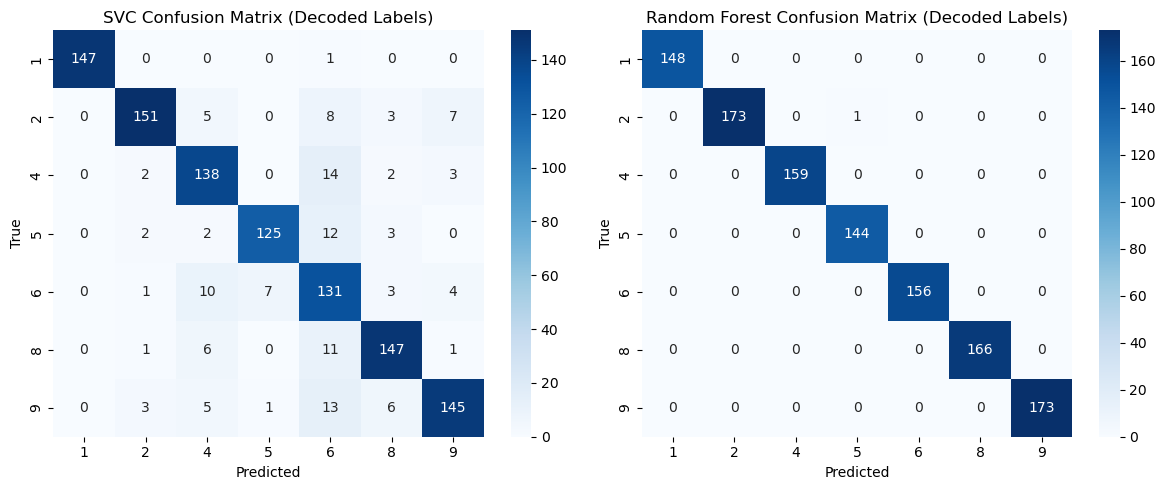

In [37]:
# Plot Confusion Matrices for Decoded Labels
plt.figure(figsize=(12, 5))

# SVC Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(svc_cm_decoded, annot=True, fmt='d', cmap="Blues", 
            xticklabels=list(label_mapping.values()), yticklabels=list(label_mapping.values()))
plt.title("SVC Confusion Matrix (Decoded Labels)")
plt.xlabel("Predicted")
plt.ylabel("True")

# Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm_decoded, annot=True, fmt='d', cmap="Blues", 
            xticklabels=list(label_mapping.values()), yticklabels=list(label_mapping.values()))
plt.title("Random Forest Confusion Matrix (Decoded Labels)")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()

In [38]:
import joblib

# Save SVC Model
joblib.dump(svc_model, 'svc_audio_numerical_text.pkl')

# Save Random Forest Model
joblib.dump(rf_model, 'rf_audio_numerical_text.pkl')


['rf_audio_numerical_text.pkl']

# CNN model

In [39]:
print(len(X))
print(len(y))

5600
5600


In [40]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3360, 322), y_train shape: (3360,)
X_val shape: (1120, 322), y_val shape: (1120,)
X_test shape: (1120, 322), y_test shape: (1120,)


In [41]:
import torch
import torch.nn as nn
import torch.optim as optim

class StressCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(StressCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Ensure dropout is defined here

        # We'll leave fc1 size flexible initially and calculate it after inspecting the shape
        self.fc1 = None
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        
        # Flatten to a 2D tensor for fully connected layer
        x = x.view(x.size(0), -1)
        
        if self.fc1 is None:
            # Dynamically calculate the input size for fc1 based on the current shape
            self.fc1 = nn.Linear(x.size(1), 128)
        
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout here
        x = self.fc2(x)
        return x




In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Adjust the labels by subtracting 1 from each target value
y_train_adjusted = y_train
y_val_adjusted = y_val
y_test_adjusted = y_test

# Convert pandas Series to numpy arrays before converting to torch tensors
y_train_adjusted = y_train_adjusted.to_numpy()  # Convert to numpy array
y_val_adjusted = y_val_adjusted.to_numpy()      # Convert to numpy array
y_test_adjusted = y_test_adjusted.to_numpy()    # Convert to numpy array

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # (batch_size, 1, 322)
y_train_tensor = torch.tensor(y_train_adjusted, dtype=torch.long)  # (batch_size,)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val_adjusted, dtype=torch.long)  # (batch_size,)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test_adjusted, dtype=torch.long)  # (batch_size,)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size)

print(torch.unique(y_train_tensor))  # Check unique labels in the training set
print(torch.unique(y_val_tensor))    # Check unique labels in the validation set


tensor([0, 1, 2, 3, 4, 5, 6])
tensor([0, 1, 2, 3, 4, 5, 6])


In [43]:
# Check the shape of your training and validation data
print(X_train_tensor.shape)  # Should be (batch_size, seq_len, input_dim)
print(X_val_tensor.shape)    # Should be (batch_size, seq_len, input_dim)

torch.Size([3360, 1, 322])
torch.Size([1120, 1, 322])


In [ ]:
# Initialize the model
num_classes = 7  # Adjust based on your dataset
model = StressCNN(num_classes=num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Track history
history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

# Early stopping parameters
early_stop_patience = 10  # Number of epochs to wait for improvement in validation loss
best_val_loss = float('inf')
patience_counter = 0

# Training loop with validation and early stopping
for epoch in range(1000):  # Train for up to 500 epochs or until early stopping
    model.train()  # Set the model to training mode
    optimizer.zero_grad()
    
    # Forward pass on training data
    outputs = model(X_train_tensor)  # Replace X_train_tensor with your training data tensor
    loss = criterion(outputs, y_train_tensor)  # Replace y_train_tensor with your training labels
    loss.backward()
    optimizer.step()
    
    # Calculate training accuracy
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    train_accuracy = correct / y_train_tensor.size(0) * 100

    # Validation step
    model.eval()  # Set the model to evaluation mode for validation
    with torch.no_grad():
        val_outputs = model(X_val_tensor)  # Replace X_val_tensor with your validation data tensor
        val_loss = criterion(val_outputs, y_val_tensor)  # Replace y_val_tensor with your validation labels
        _, val_predicted = torch.max(val_outputs, 1)
        val_correct = (val_predicted == y_val_tensor).sum().item()
        val_accuracy = val_correct / y_val_tensor.size(0) * 100

    # Store history
    history["train_loss"].append(loss.item())
    history["val_loss"].append(val_loss.item())
    history["train_acc"].append(train_accuracy)
    history["val_acc"].append(val_accuracy)

    # Print progress
    print(f"Epoch [{epoch+1}/1000], Train Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Early stopping check based on validation loss
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        patience_counter = 0  # Reset counter if improvement
    else:
        patience_counter += 1

    # Trigger early stopping if validation loss doesn't improve
    if patience_counter >= early_stop_patience:
        print(f"Early stopping at epoch {epoch+1}. Best Validation Loss: {best_val_loss:.4f}")
        break


In [ ]:

# Plot loss and accuracy curves
def plot_history(history):
    epochs = range(1, len(history["train_loss"]) + 1)
    plt.figure(figsize=(12, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["train_loss"], label="Train Loss")
    plt.plot(epochs, history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["train_acc"], label="Train Accuracy")
    plt.plot(epochs, history["val_acc"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()

    plt.show()

plot_history(history)

# # Classification report
# val_pred = val_predicted.cpu().numpy()
# val_true = y_val_tensor.cpu().numpy()
# print("\nClassification Report:\n", classification_report(val_true, val_pred))

# # Confusion matrix
# cm = confusion_matrix(val_true, val_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(9), yticklabels=range(9))
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.show()

# # ROC and AUC for multi-class classification (not just binary)
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import roc_auc_score, roc_curve

# y_true_bin = label_binarize(val_true, classes=list(range(9)))  # Binarize for multi-class
# y_pred_prob = torch.softmax(val_outputs, dim=1).cpu().numpy()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import torch

# Assuming val_true and val_pred are the true and predicted labels
val_true = y_val_tensor.cpu().numpy()  
val_pred = val_predicted.cpu().numpy()  

# Label mapping
label_mapping = {0: '1', 1: '2', 2: '4', 3: '5', 4: '6', 5: '8', 6: '9'}

# Decode true and predicted labels
val_true_decoded = [label_mapping[label] for label in val_true]
val_pred_decoded = [label_mapping[label] for label in val_pred]

# Classification report with decoded labels
print("\nClassification Report (Decoded Labels):\n")
print(classification_report(val_true_decoded, val_pred_decoded))

# Confusion matrix with decoded labels
cm = confusion_matrix(val_true_decoded, val_pred_decoded, labels=list(label_mapping.values()))

# Plot confusion matrix with decoded labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=list(label_mapping.values()), yticklabels=list(label_mapping.values()))
plt.title("Confusion Matrix (Decoded Labels)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Binarize the true labels for multi-class ROC analysis
val_true_bin = label_binarize(val_true, classes=list(label_mapping.keys()))
val_pred_prob = torch.softmax(val_outputs, dim=1).cpu().numpy()

# Compute ROC AUC for each class
roc_auc = {}
for idx, class_name in label_mapping.items():
    roc_auc[class_name] = roc_auc_score(val_true_bin[:, idx], val_pred_prob[:, idx])

# Print ROC AUC scores for each class
print("\nROC AUC Scores by Class (Decoded Labels):")
for class_name, auc in roc_auc.items():
    print(f"Class {class_name}: AUC = {auc:.2f}")

In [ ]:
torch.save(model.state_dict(), "cnn_audio_numerical_text.pth")
print("Model saved to 'trained_model.pth'")

# LSTM+ CNN

In [45]:
class LSTM_CNN_Model(nn.Module):
    def __init__(self, input_dim, hidden_dim, lstm_layers, cnn_channels, num_classes):
        super(LSTM_CNN_Model, self).__init__()

        # Add a Linear layer to project input to the correct size for LSTM
        self.input_projection = nn.Linear(input_dim, 40)

        self.lstm = nn.LSTM(40, hidden_dim, num_layers=lstm_layers, batch_first=True, bidirectional=True)
        self.conv1 = nn.Conv1d(in_channels=hidden_dim * 2, out_channels=cnn_channels, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(cnn_channels, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Project input to the correct size
        x = self.input_projection(x)

        x, (hn, cn) = self.lstm(x)
        x = x.permute(0, 2, 1)
        x = self.relu(self.conv1(x))
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [46]:
# Check the shape of your training and validation data
print(X_train_tensor.shape)  # Should be (batch_size, seq_len, input_dim)
print(X_val_tensor.shape)    # Should be (batch_size, seq_len, input_dim)


torch.Size([3360, 1, 322])
torch.Size([1120, 1, 322])


In [47]:
# Initialize model, criterion, and optimizer
model = LSTM_CNN_Model(input_dim=322, hidden_dim=64, lstm_layers=2, cnn_channels=32, num_classes=7)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Track history
history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

# Early stopping parameters
early_stop_patience = 10
best_val_loss = float('inf')
patience_counter = 0

# Training loop
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    train_accuracy = correct / y_train_tensor.size(0) * 100

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        _, val_predicted = torch.max(val_outputs, 1)
        val_correct = (val_predicted == y_val_tensor).sum().item()
        val_accuracy = val_correct / y_val_tensor.size(0) * 100

    # Store history
    history["train_loss"].append(loss.item())
    history["val_loss"].append(val_loss.item())
    history["train_acc"].append(train_accuracy)
    history["val_acc"].append(val_accuracy)

    # Verbose output
    print(f"Epoch [{epoch+1}/1000], Train Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= early_stop_patience:
        print(f"Early stopping at epoch {epoch+1}. Best Validation Loss: {best_val_loss:.4f}")
        break



Epoch [1/1000], Train Loss: 1.9493, Train Accuracy: 14.58%
Validation Loss: 1.9470, Validation Accuracy: 14.82%
Epoch [2/1000], Train Loss: 1.9476, Train Accuracy: 14.23%
Validation Loss: 1.9464, Validation Accuracy: 14.82%
Epoch [3/1000], Train Loss: 1.9474, Train Accuracy: 14.17%
Validation Loss: 1.9458, Validation Accuracy: 14.82%
Epoch [4/1000], Train Loss: 1.9458, Train Accuracy: 14.61%
Validation Loss: 1.9452, Validation Accuracy: 14.82%
Epoch [5/1000], Train Loss: 1.9476, Train Accuracy: 14.14%
Validation Loss: 1.9446, Validation Accuracy: 14.82%
Epoch [6/1000], Train Loss: 1.9453, Train Accuracy: 14.88%
Validation Loss: 1.9438, Validation Accuracy: 14.91%
Epoch [7/1000], Train Loss: 1.9435, Train Accuracy: 14.76%
Validation Loss: 1.9430, Validation Accuracy: 16.88%
Epoch [8/1000], Train Loss: 1.9432, Train Accuracy: 15.54%
Validation Loss: 1.9420, Validation Accuracy: 28.04%
Epoch [9/1000], Train Loss: 1.9421, Train Accuracy: 15.77%
Validation Loss: 1.9407, Validation Accuracy:


Classification Report (Mapped Labels):

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       166
           2       0.94      0.96      0.95       162
           4       0.99      0.93      0.96       150
           5       0.96      0.96      0.96       166
           6       0.93      0.99      0.96       149
           8       0.99      0.93      0.95       160
           9       0.98      0.99      0.98       167

    accuracy                           0.97      1120
   macro avg       0.97      0.96      0.96      1120
weighted avg       0.97      0.97      0.97      1120



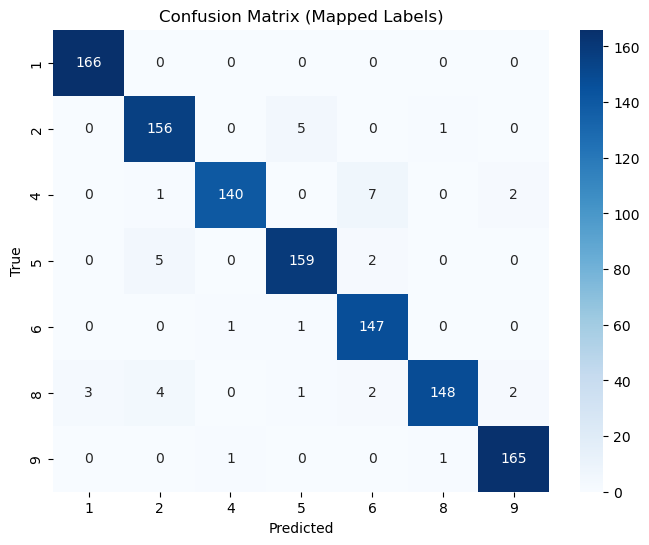


ROC AUC Scores by Class (Mapped Labels):
Class 1: AUC = 1.00
Class 2: AUC = 1.00
Class 4: AUC = 0.99
Class 5: AUC = 1.00
Class 6: AUC = 1.00
Class 8: AUC = 0.98
Class 9: AUC = 0.99


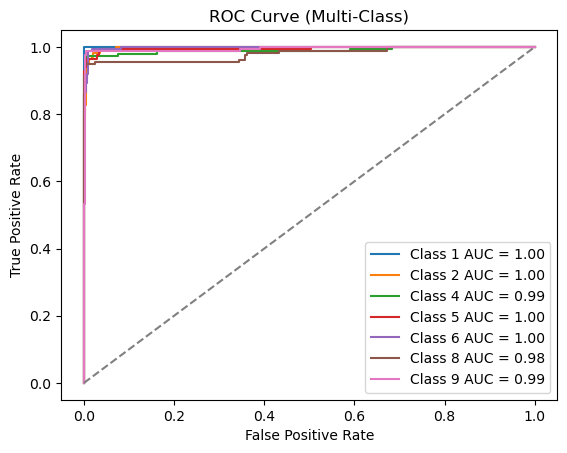

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import torch

# Assuming val_true and val_pred are the true and predicted labels
val_true = y_val_tensor.cpu().numpy()  
val_pred = val_predicted.cpu().numpy() 

# Label mapping
label_mapping = {0: '1', 1: '2', 2: '4', 3: '5', 4: '6', 5: '8', 6: '9'}

# Decode true and predicted labels
val_true_decoded = [label_mapping[label] for label in val_true]
val_pred_decoded = [label_mapping[label] for label in val_pred]

# Classification report with label mapping
print("\nClassification Report (Mapped Labels):\n")
print(classification_report(val_true_decoded, val_pred_decoded))

# Confusion matrix with label mapping
cm = confusion_matrix(val_true_decoded, val_pred_decoded, labels=list(label_mapping.values()))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=list(label_mapping.values()), yticklabels=list(label_mapping.values()))
plt.title("Confusion Matrix (Mapped Labels)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC and AUC
if len(set(val_true)) == 2:  # Binary classification
    # Binary classification ROC-AUC
    val_probs = torch.softmax(val_outputs, dim=1)[:, 1].cpu().numpy()
    auc = roc_auc_score(val_true, val_probs)
    fpr, tpr, _ = roc_curve(val_true, val_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.title("ROC Curve (Binary)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()
else:
    # Multi-class ROC-AUC
    val_true_bin = label_binarize(val_true, classes=list(label_mapping.keys()))
    val_pred_prob = torch.softmax(val_outputs, dim=1).cpu().numpy()
    
    roc_auc = {}
    for idx, class_name in label_mapping.items():
        roc_auc[class_name] = roc_auc_score(val_true_bin[:, idx], val_pred_prob[:, idx])

    # Print ROC AUC for each class
    print("\nROC AUC Scores by Class (Mapped Labels):")
    for class_name, auc in roc_auc.items():
        print(f"Class {class_name}: AUC = {auc:.2f}")

    # Optional: Plot micro-average ROC curve for multi-class
    fpr = {}
    tpr = {}
    for idx, class_name in label_mapping.items():
        fpr[class_name], tpr[class_name], _ = roc_curve(val_true_bin[:, idx], val_pred_prob[:, idx])
        plt.plot(fpr[class_name], tpr[class_name], label=f"Class {class_name} AUC = {roc_auc[class_name]:.2f}")
    
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.title("ROC Curve (Multi-Class)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()


In [49]:
torch.save(model.state_dict(), "cnn_lstm_audio_numerical_text.pth")
print("Model saved to 'trained_model.pth'")

Model saved to 'trained_model.pth'
